In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

1. get data
2. EDA
3. train test split
4. std
5. model
6. evaluate

Get data and EDA

In [2]:
bc = load_breast_cancer()
type(bc)

sklearn.utils.Bunch

In [3]:
data = pd.DataFrame(bc.data , columns=bc.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# data is very clearn

train_test_split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(data, bc.target, random_state=17)

Standardize data

In [6]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

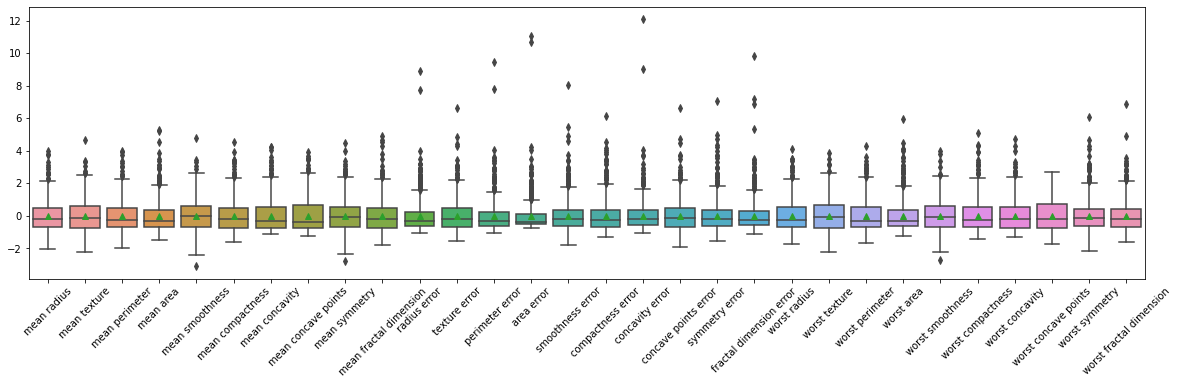

In [7]:
fig,ax=plt.subplots(figsize=(20,5))
sns.boxplot(data=pd.DataFrame(std.fit_transform(data), columns=bc.feature_names), showmeans=True )
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


#### modeling
default parameters

In [8]:
estimator = LogisticRegression()
estimator.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
print('coef: \n',estimator.coef_)
print('intercept: \n',estimator.intercept_)

coef: 
 [[-0.3617256  -0.59733953 -0.3418876  -0.40988298 -0.05321142  0.11939414
  -1.02262349 -0.93086068 -0.03432991  0.3178288  -1.30238483  0.45421609
  -0.75224602 -0.87673262  0.02632351  0.92631145 -0.21895359 -0.16260629
   0.21831658  0.99498152 -1.00339324 -1.21496306 -0.76685761 -0.89312479
  -0.70173989 -0.10429926 -1.08774439 -0.78391822 -0.73424686 -0.32357304]]
intercept: 
 [0.42209119]


In [15]:
y_predict = estimator.predict(x_test)
print('y_predict: \n',y_predict)
print('compare real to predict: \n', y_test==y_predict)

y_predict: 
 [1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0]
compare real to predict: 
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True

In [17]:
score = estimator.score(x_test, y_test)
print('score: \n', score)

score: 
 0.972027972027972


customized parameters

In [34]:
estimator_cus = LogisticRegression( solver='liblinear', penalty='l2', max_iter=10000, C=1.0 )
estimator_cus.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
print('coef_cus: \n',estimator_cus.coef_)
print('intercept_cus: \n',estimator_cus.intercept_)

coef_cus: 
 [[-0.3411665  -0.57972217 -0.32156132 -0.41931207 -0.03517773  0.13449007
  -1.03267335 -0.94061083 -0.03762515  0.29243701 -1.31069054  0.45057977
  -0.76202902 -0.90773918 -0.00315735  0.93959941 -0.20663092 -0.13114451
   0.20754036  0.96973886 -1.0078941  -1.21193601 -0.77160447 -0.93045883
  -0.7017952  -0.09747956 -1.08217794 -0.7839473  -0.726057   -0.33611821]]
intercept_cus: 
 [0.33444561]


In [38]:
y_cus_predict = estimator_cus.predict(x_test)
print('y_cus_predict: \n',y_cus_predict)
print('compare real to predict_cus: \n', y_test==y_cus_predict)

y_cus_predict: 
 [1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0]
compare real to predict_cus: 
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  Tr

In [39]:
score_cus = estimator_cus.score(x_test, y_test)
print('score_cus: \n', score_cus)

score_cus: 
 0.972027972027972
